In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
df = pd.read_csv('Sales_with_NaNs_v1.3.csv')

Accuracy : 0.527086383601757
Precision: 0.5283018867924528
Recall   : 0.5697674418604651
F1 Score : 0.5482517482517483


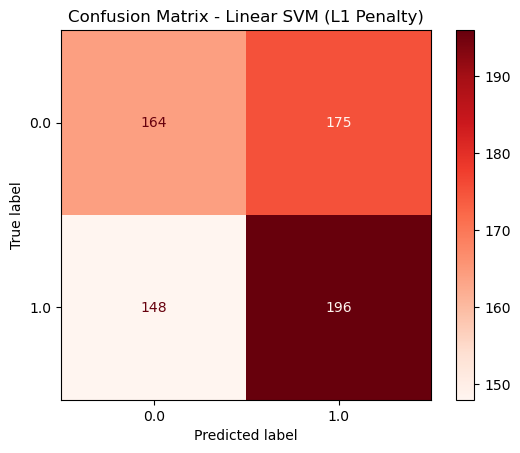

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# 1. Load dataset
df = pd.read_csv('Sales_with_NaNs_v1.3.csv')

# 2. Encode target
df['Purchase_Made'] = df['Purchase_Made'].map({'Yes': 1, 'No': 0})

# 3. Define features and target
features = ['Group', 'Customer_Segment', 'Sales_Before', 'Sales_After',
            'Customer_Satisfaction_Before', 'Customer_Satisfaction_After']
X = df[features]
y = df['Purchase_Made']

# 4. Drop rows with any missing values (in X or y)
data = pd.concat([X, y], axis=1).dropna()
X = data[features]
y = data['Purchase_Made']

# 5. One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Group', 'Customer_Segment'], drop_first=True)

# 6. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 8. Train Linear SVM with L1 penalty
model = LinearSVC(penalty='l1', dual=False, max_iter=10000, random_state=42)
model.fit(X_train, y_train)

# 9. Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix - Linear SVM (L1 Penalty)")
plt.show()


Accuracy : 0.5241581259150805
Precision: 0.5257452574525745
Recall   : 0.563953488372093
F1 Score : 0.544179523141655


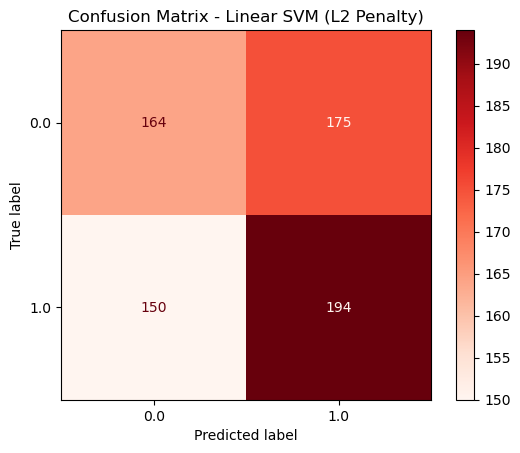

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)

# 1. Load dataset
df = pd.read_csv('Sales_with_NaNs_v1.3.csv')

# 2. Encode target
df['Purchase_Made'] = df['Purchase_Made'].map({'Yes': 1, 'No': 0})

# 3. Define features and target
features = ['Group', 'Customer_Segment', 'Sales_Before', 'Sales_After',
            'Customer_Satisfaction_Before', 'Customer_Satisfaction_After']
X = df[features]
y = df['Purchase_Made']

# 4. Drop rows with any missing values (in X or y)
data = pd.concat([X, y], axis=1).dropna()
X = data[features]
y = data['Purchase_Made']

# 5. One-hot encode categorical variables
X = pd.get_dummies(X, columns=['Group', 'Customer_Segment'], drop_first=True)

# 6. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 8. Train Linear SVM with L2 penalty
model = LinearSVC(penalty='l2', dual=True, max_iter=10000, random_state=42)
model.fit(X_train, y_train)

# 9. Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix - Linear SVM (L2 Penalty)")
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14912\1383475635.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[num_cols] = num_imputer.fit_transform(X[num_cols])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14912\1383475635.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])


Accuracy : 0.5116911364872213
Precision: 0.5139888089528377
Recall   : 0.6891747052518756
F1 Score : 0.5888278388278388


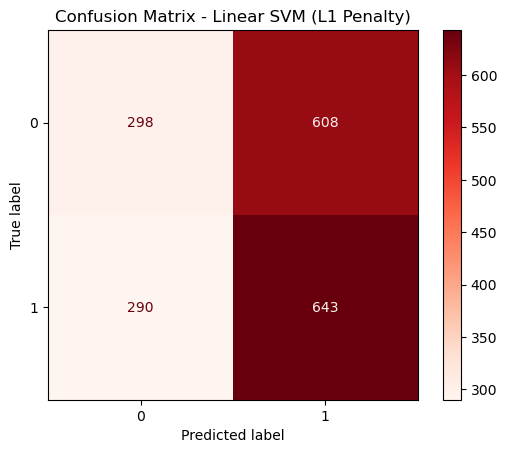

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
df = pd.read_csv('Sales_with_NaNs_v1.3.csv')

# 1. Handle missing target
df = df.dropna(subset=['Purchase_Made'])
df['Purchase_Made'] = df['Purchase_Made'].map({'Yes': 1, 'No': 0})  # Adjust mapping if different

# 2. Feature and target definition
features = ['Group', 'Customer_Segment', 'Sales_Before', 'Sales_After',
            'Customer_Satisfaction_Before', 'Customer_Satisfaction_After']
X = df[features]
y = df['Purchase_Made']

# 3. Separate numeric and categorical
num_cols = ['Sales_Before', 'Sales_After', 'Customer_Satisfaction_Before', 'Customer_Satisfaction_After']
cat_cols = ['Group', 'Customer_Segment']

# 4. Impute missing values
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')
X[num_cols] = num_imputer.fit_transform(X[num_cols])
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

# 5. One-hot encode categoricals
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# 6. Scale features (very important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 8. Train RBF SVM
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # You can tune C/gamma
model.fit(X_train, y_train)

# 9. Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
# 10. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix - Linear SVM (L1 Penalty)")
plt.show()
